# Analytical solutions to curvatures and bending force of a biconcave cell

In [1]:
import numpy as np
from math import *
from sympy import *
import matplotlib.pyplot as plt

In [2]:
x, y, z = symbols('x y z')
R, c0, c1, c2 = symbols('R c0 c1 c2')
rho, f, fx, fy, fz, ngf, curv, gcurv, lbcurv, fbend = symbols('rho f fx fy fz ngf curv gcurv lbcurv fbend')
init_printing()

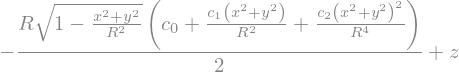

In [3]:
rho = sqrt(x**2 + y**2)/R
f = z - (R/2)*sqrt(1 - rho**2)*(c0 + c1*rho**2 + c2*rho**4)
f

In [4]:
fx = diff(f, x)
fy = diff(f, y)
fz = diff(f, z)
ngf = sqrt(fx**2 + fy**2 + fz**2)
fxx, fxy, fxz, fyx, fyy, fyz, fzx, fzy, fzz = symbols('fxx fxy fxz fyx fyy fyz fzx fzy fzz')
fxx = diff(fx, x)
fxy = diff(fx, y)
fxz = diff(fx, z)
fyy = diff(fy, y)
fyx = diff(fy, x)
fyz = diff(fy, z)
fzz = diff(fz, z)
fzx = diff(fz, x)
fzy = diff(fz, y)
nx, ny, nz = symbols('nx ny nz')
nx = fx/ngf
ny = fy/ngf
nz = fz/ngf

In [5]:
curv = .5*(diff(fx/ngf, x) + diff(fy/ngf, y) + diff(fz/ngf, z))
gcurv = ((fz*(fxx*fz - 2*fx*fxz) + fx**2*fzz)*(fz*(fyy*fz - 2*fy*fyz) + fy**2*fzz) - 
         (fz*(-fx*fyz + fxy*fz - fxz*fy) + fx*fy*fzz)**2)/(fz**2*ngf**4)
cx, cy, cz, scx, scy, scz = symbols('cx cy cz scx, scy, scz')
cx = diff(curv, x)
cy = diff(curv, y)
cz = diff(curv, z)
scx = (1 - nx**2)*cx - nx*ny*cy - nx*nz*cz
scy = -nx*ny*cx + (1 - ny**2)*cy - ny*nz*cz
scz = -nx*nz*cx - ny*nz*cy + (1 - nz**2)*cz
lbcurv = (((1 - nx**2)*diff(scx,x) - nx*ny*diff(scx,y) - nx*nz*diff(scx,z)) + 
          (-nx*ny*diff(scy,x) + (1 - ny**2)*diff(scy,y) - ny*nz*diff(scy,z)) + 
          (-nx*nz*diff(scz,x) - ny*nz*diff(scz,y) + (1 - nz**2)*diff(scz,z)))

In [ ]:
myR = 1
myc0 = 0.2072 
myc1 = 2.0026
myc2 = -1.1228
N = 10
myx = np.hstack((np.linspace(0, myR*.9, N),np.linspace(myR*.9, myR, N)))
# myx = np.linspace(0, myR, N)

exp_curv = np.zeros((2,len(myx)-1))
exp_gcurv = np.zeros((2,len(myx)-1))
exp_lbcurv = np.zeros((2,len(myx)-1))
for i in range(len(myx)-1):
    myz = -f.evalf(subs={R:myR, c0:myc0, c1:myc1, c2:myc2, y:0, x:myx[i], z:0})
    exp_curv[0, i] = acos(myz/sqrt(myx[i]**2 + myz**2))
    exp_curv[1, i] = curv.evalf(subs={R:myR, c0:myc0, c1:myc1, c2:myc2, y:0, x:myx[i], z:myz})
    exp_gcurv[0, i] = exp_curv[0, i]
    exp_gcurv[1, i] = gcurv.evalf(subs={R:myR, c0:myc0, c1:myc1, c2:myc2, y:0, x:myx[i], z:myz})
    exp_lbcurv[0, i] = exp_curv[0, i]
#     exp_lbcurv[1, i] = lbcurv(myx[i], myz)
    exp_lbcurv[1, i] = lbcurv.evalf(subs={R:myR, c0:myc0, c1:myc1, c2:myc2, y:0, x:myx[i], z:myz})
    print(100*i/len(myx),"%")
# np.savetxt("curvature_rbc/rbc_exact_curv.csv", np.transpose(exp_curv), delimiter=", ")
# np.savetxt("curvature_rbc/rbc_exact_gcurv.csv", np.transpose(exp_gcurv), delimiter=", ")
# np.savetxt("curvature_rbc/rbc_exact_lbcurv.csv", np.transpose(exp_lbcurv), delimiter=", ")

0.0 %
1.0 %
2.0 %


In [ ]:
exp_bending = np.zeros((2,len(myx)-1))
for i in range(len(myx)-1):
    exp_bending[0, i] = exp_curv[0, i]
    exp_bending[1, i] = fabs(2*(2*exp_curv[1, i]*(exp_curv[1, i]**2 - exp_gcurv[1, i]) + exp_lbcurv[1, i]))
np.savetxt("curvature_rbc/rbc_exact_bending.csv", np.transpose(exp_bending), delimiter=", ")

In [ ]:
plt.plot(exp_curv[0,:]/pi, exp_curv[1,:])
plt.plot(exp_gcurv[0,:]/pi, exp_gcurv[1,:])
plt.xlabel('$\\theta/\pi$')
plt.ylabel('Mean and Gaussian curvature $\\kappa$, $\\kappa_g$')
plt.grid('on')

In [ ]:
plt.plot(exp_lbcurv[0,:]/pi, exp_lbcurv[1,:])
plt.xlabel('$\\theta/\pi$')
plt.ylabel('Surface Laplacian of the mean curvature')
plt.grid('on')

In [ ]:
plt.plot(exp_bending[0,:]/pi, exp_bending[1,:])
plt.xlabel('$\\theta/\pi$')
plt.ylabel('Bending force')
plt.grid('on')